In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import random
import magpylib as magpy
import nbimporter
%run CoilCreator.ipynb

In [9]:
%matplotlib notebook
#%matplotlib auto

<IPython.core.display.Javascript object>


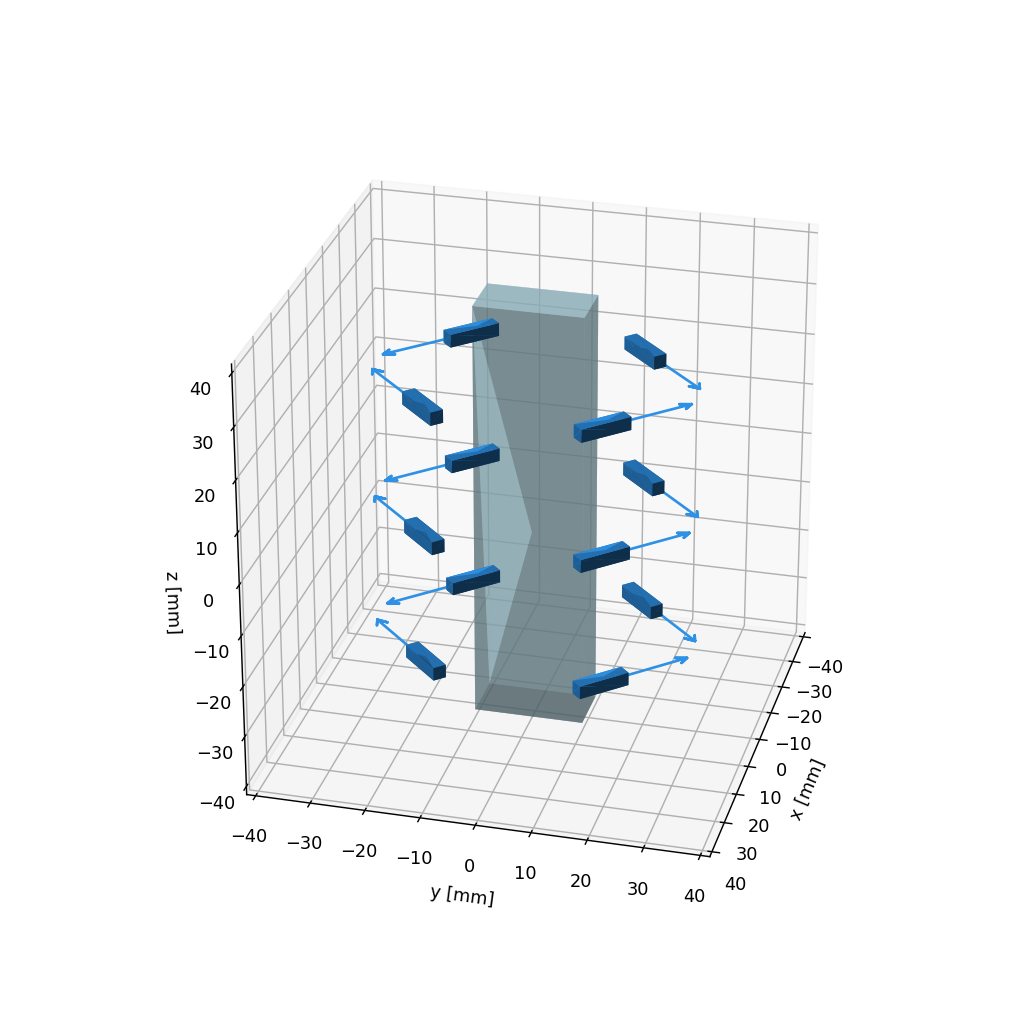

In [10]:
# Magnetization in mT (Remanence field)
## Remanence: Remanence or remanent magnetization or residual magnetism is the magnetization 
## left behind in a ferromagnetic material (such as iron) after an external magnetic field is removed. (Wikipedia)
# Dimension: in mm
# Poisition: in mm
barx = 2.5 # mm
bary = 10 # mm
barz = 2.5 # mm
rem = 1000 # mT


def buildMagnets(includeCell = False):
    collection = magpy.Collection()
    for z in [-25, 0, 25]:
        cell = magpy.magnet.Cuboid(magnetization=(0,0,0), dimension=(10, 20, 80), style={'color':"lightblue", 'opacity':0.25})
        collection.add(cell)

        bar1 = magpy.magnet.Cuboid(magnetization=(0,-rem,0), dimension=(barx, bary, barz), position=(16, -16, z))
        bar1.rotate_from_angax(-45, axis='z')
        collection.add(bar1)

        bar2 = magpy.magnet.Cuboid(magnetization=(0,rem,0), dimension=(barx, bary, barz), position=(16, 16, z))
        bar2.rotate_from_angax(45, axis='z')
        collection.add(bar2)

        bar3 = magpy.magnet.Cuboid(magnetization=(0,-rem,0), dimension=(barx, bary, barz), position=(-16, -16, z))
        bar3.rotate_from_angax(45, axis='z')
        collection.add(bar3)

        bar4 = magpy.magnet.Cuboid(magnetization=(0,rem,0), dimension=(barx, bary, barz), position=(-16, 16, z))
        bar4.rotate_from_angax(-45, axis='z')
        collection.add(bar4)

    return collection

collection = buildMagnets(includeCell=True)
collection.show()

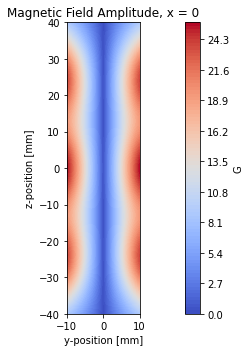

In [15]:
def plot_amp_yz(coil1, x):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    yts = np.linspace(-10, 10, 40)
    zts = np.linspace(-40, 40, 100)
    grid = np.array([[(x,y,z) for y in yts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) # mT
    
    cp = axs.contourf(
        grid[:,:,1], grid[:,:,2], Bamp * 10,
        levels=100,
        cmap='coolwarm',
    )
    axs.set(
        title='Magnetic Field Amplitude, x = '+str(x),
        xlabel='y-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='G')
    plt.tight_layout()
    plt.show()

plot_amp_yz(collection, x=0)

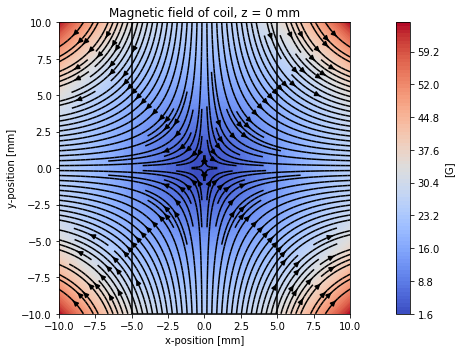

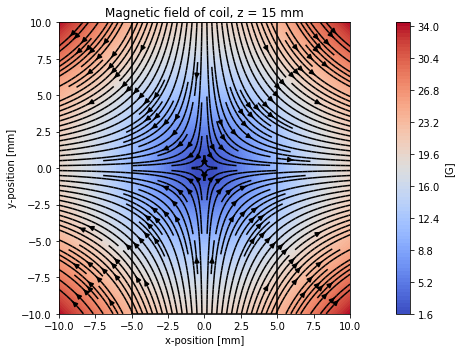

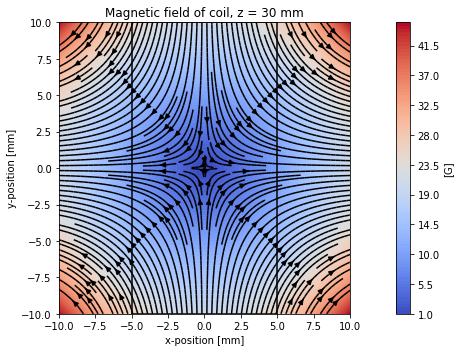

In [6]:
cell_x = 10 #mm
cell_y = 20 #mm
cell_z = 80 #mm
def plot_mag_field_xy(coil1, z=0):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    
    # create grid
    ts = np.linspace(-cell_y/2, cell_y/2, 20)
    grid = np.array([[(x,y,z) for x in ts] for y in ts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,1], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,0], grid[:,:,1], B[:,:,0], B[:,:,1],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil, z = '+str(z)+" mm",
        xlabel='x-position [mm]',
        ylabel='y-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    
    
    # Plotting cell on heatmap:
    plt.plot([-cell_x/2, cell_x/2], [cell_y/2, cell_y/2], '-k')
    plt.plot([-cell_x/2, cell_x/2], [-cell_y/2, -cell_y/2], '-k')
    plt.plot([cell_x/2, cell_x/2], [cell_y/2, -cell_y/2], '-k')
    plt.plot([-cell_x/2, -cell_x/2], [cell_y/2, -cell_y/2], '-k')
    
    
    
    plt.show()

plot_mag_field_xy(collection,z=0)
plot_mag_field_xy(collection,z=15)
plot_mag_field_xy(collection,z=30)

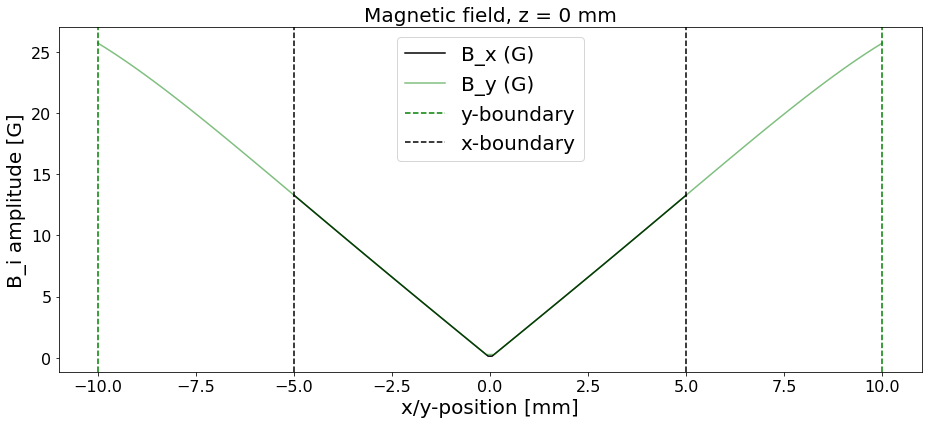

In [8]:
def plot_mag_amp_line(coil1,z):
    fig, ax = plt.subplots(1, 1, figsize=(13,6))
    xts = np.linspace(-cell_x/2, cell_x/2, 100)
    grid = np.array([(x,0,z) for x in xts])
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=1) * 10 # in Gauss
    ax.plot(grid[:,0],Bamp, label="B_x (G)", c="k")
    ax.set_title('Magnetic field, z = '+str(z)+" mm", fontsize=20)
    ax.set_xlabel('x/y-position [mm]', fontsize=20)
    ax.set_ylabel('B_i amplitude [G]', fontsize=20)
    ax.tick_params('both', labelsize=16)
    
    yts = np.linspace(-cell_y/2, cell_y/2, 100)
    grid = np.array([(0,y,z) for y in yts])
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=1) * 10 # in Gauss
    ax.plot(grid[:,1],Bamp, label="B_y (G)", c="g", ls="-", alpha=0.5)

    
    plt.axvline(-cell_y/2, label="y-boundary", c="g", ls="--")
    plt.axvline(cell_y/2, c="g", ls="--")
    
    plt.axvline(-cell_x/2, label="x-boundary", c="k", ls="--")
    plt.axvline(cell_x/2, c="k", ls="--")
    
    plt.tight_layout()
    plt.legend(fontsize=20)
    plt.show()
    
plot_mag_amp_line(collection, z=0)

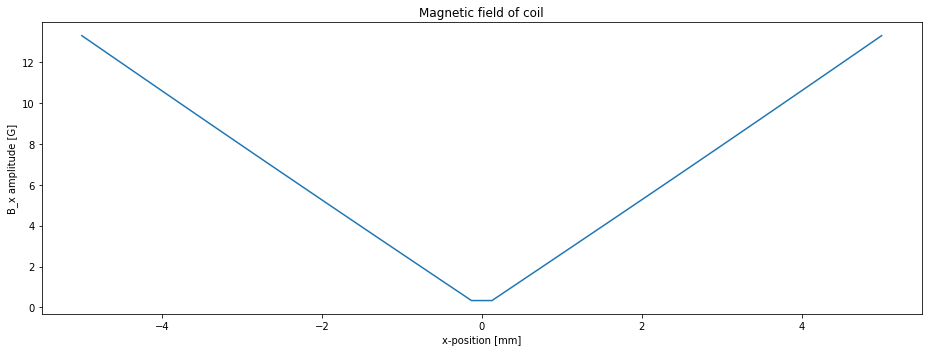

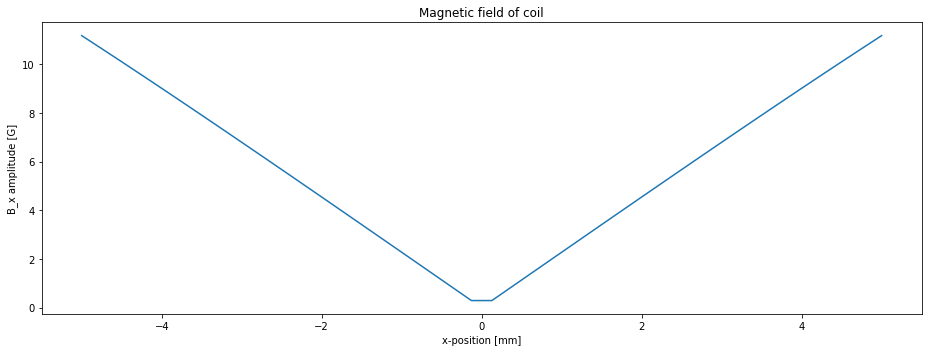

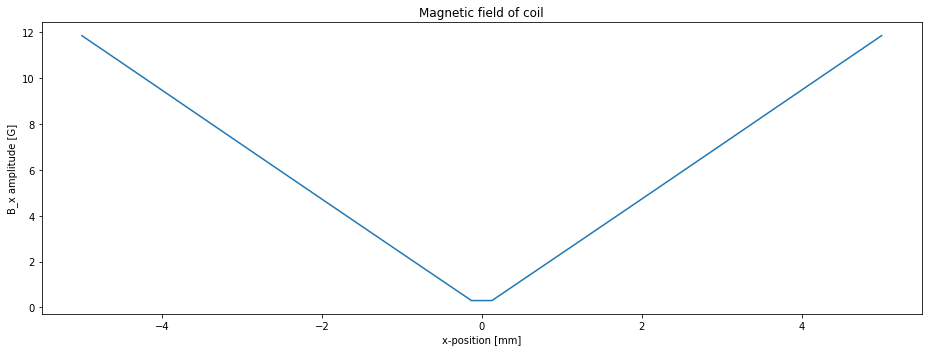

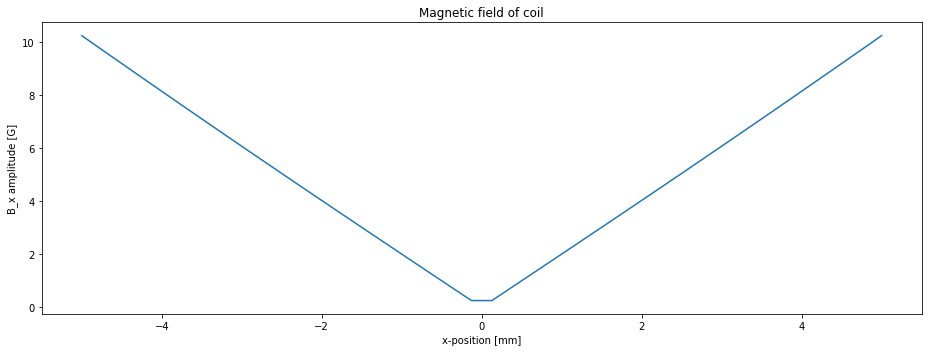

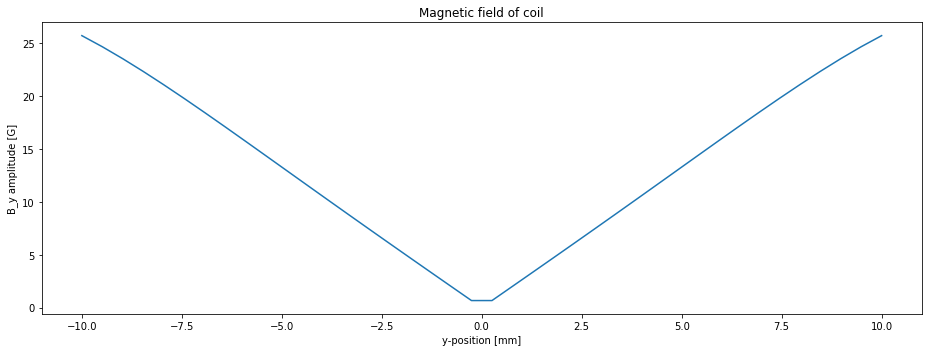

In [17]:
def plot_x_amp(coil1,z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    ts = np.linspace(-5, 5, 40)
    grid = np.array([(x,0,z) for x in ts])
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=1) * 10 # in Gauss
    axs.plot(grid[:,0],Bamp)
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='B_x amplitude [G]',
    )
    plt.tight_layout()
    plt.show()
    
def plot_y_amp(coil1,z):
    fig, axs = plt.subplots(1, 1, figsize=(13,5))
    ts = np.linspace(-10, 10, 40)
    grid = np.array([(0,y,z) for y in ts])
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=1) * 10 # in Gauss
    axs.plot(grid[:,1],Bamp)
    axs.set(
        title='Magnetic field of coil',
        xlabel='y-position [mm]',
        ylabel='B_y amplitude [G]',
    )
    plt.tight_layout()
    plt.show()
    
plot_x_amp(collection, 0)
plot_x_amp(collection, 10)
plot_x_amp(collection, 20)
plot_x_amp(collection, 30)
plot_y_amp(collection, 0)

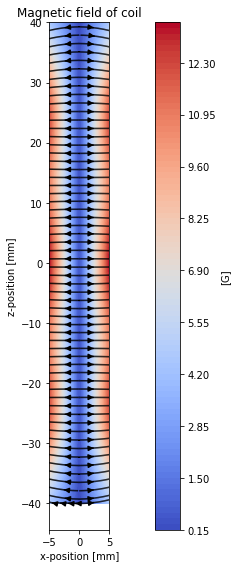

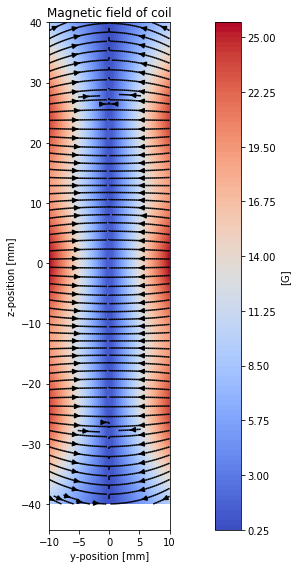

In [23]:
def plot_mag_field_xz(coil1, y=0):
    fig, axs = plt.subplots(1, 1, figsize=(13,8))
    
    # create grid
    ts = np.linspace(-5, 5, 20)
    zts = np.linspace(-40, 40, 100)
    grid = np.array([[(x,y,z) for x in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,0], grid[:,:,2], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,0], grid[:,:,2], B[:,:,0], B[:,:,2],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil',
        xlabel='x-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    plt.show()
    
def plot_mag_field_yz(coil1, x=0):
    fig, axs = plt.subplots(1, 1, figsize=(13,8))
    
    # create grid
    ts = np.linspace(-10, 10, 20)
    zts = np.linspace(-40, 40, 100)
    grid = np.array([[(x,y,z) for y in ts] for z in zts])
    
    # compute and plot field of coil2
    B = magpy.getB(coil1, grid)
    Bamp = np.linalg.norm(B, axis=2) * 10
    
    cp = axs.contourf(
        grid[:,:,1], grid[:,:,2], Bamp,
        levels=100,
        cmap='coolwarm',
    )
    axs.streamplot(
        grid[:,:,1], grid[:,:,2], B[:,:,1], B[:,:,2],
        density=2,
        color='black',
    )
    axs.set(
        title='Magnetic field of coil',
        xlabel='y-position [mm]',
        ylabel='z-position [mm]',
        aspect=1,
    )
    plt.colorbar(cp, ax=axs, label='[G]')
    plt.tight_layout()
    plt.show()

plot_mag_field_xz(collection, y=0)
plot_mag_field_yz(collection, x=0)

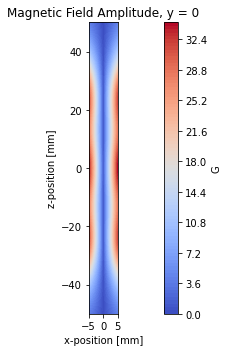

In [7]:
plot_amp_xz(collection, y=0)

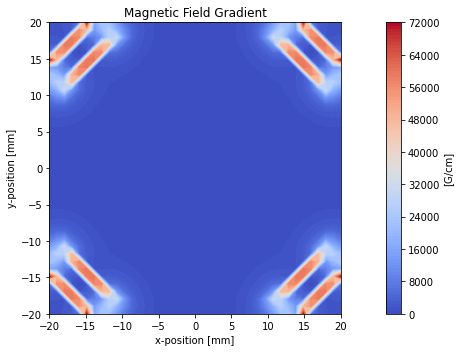

In [8]:
plot_grad_xy(collection, z=0)